In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Online%20Purchase.csv')

In [6]:
df.head()

,Customer_ID,Gender,Age,Salary,Purchased
0,1,Male,35,500,0
1,2,Female,25,300000,1
2,3,Female,100,200000,0
3,15566689,Female,35,57000,0
4,15569641,Female,58,95000,1


In [7]:
df.shape

(403, 5)

In [8]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  403 non-null    int64 
 1   Gender       403 non-null    object
 2   Age          403 non-null    int64 
 3   Salary       403 non-null    int64 
 4   Purchased    403 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.9+ KB


In [10]:
df.describe()

,Customer_ID,Age,Salary,Purchased
count,4.030000e+02,403.000000,403.000000,403.000000
mean,1.557473e+07,37.771712,70465.260546,0.357320
std,1.352373e+06,10.915209,36598.127268,0.479806
min,1.000000e+00,18.000000,500.000000,0.000000
25%,1.562463e+07,29.500000,43000.000000,0.000000
50%,1.569326e+07,37.000000,70000.000000,0.000000
75%,1.575020e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,100.000000,300000.000000,1.000000


In [11]:
y = df['Purchased']

In [12]:
y.shape

(403,)

In [13]:
X = df[['Age', 'Salary']]

In [14]:
X.shape

(403, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a53a4ff90>]],
      dtype=object)

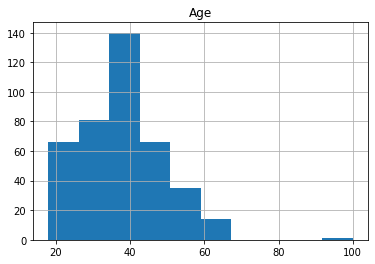

In [15]:
df[['Age']].hist()

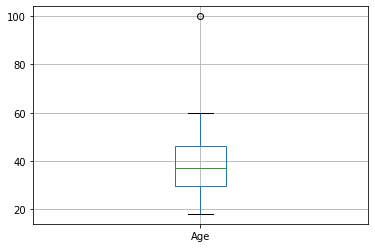

In [16]:
df[['Age']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a53272b10>]],
      dtype=object)

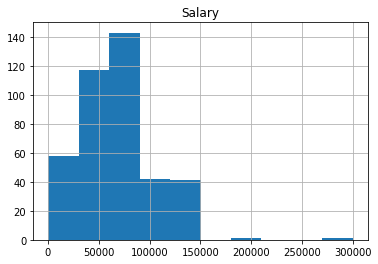

In [17]:
df[['Salary']].hist()

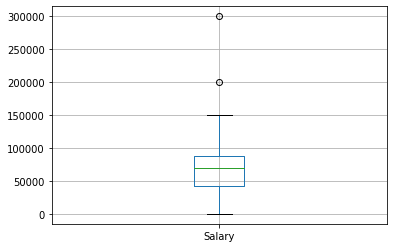

In [18]:
df[['Salary']].boxplot()

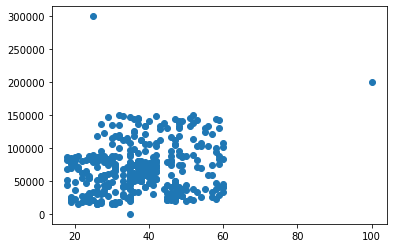

In [19]:
plt.scatter(df['Age'], df['Salary'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2529)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((282, 2), (121, 2), (282,), (121,))

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [26]:
X_train_ss = ss.fit_transform(X_train)

In [27]:
X_test_ss = ss.fit_transform(X_test)

In [29]:
X_train_ss = pd.DataFrame(X_train_ss, columns = X_train.columns)
X_test_ss = pd.DataFrame(X_test_ss, columns = X_test.columns)

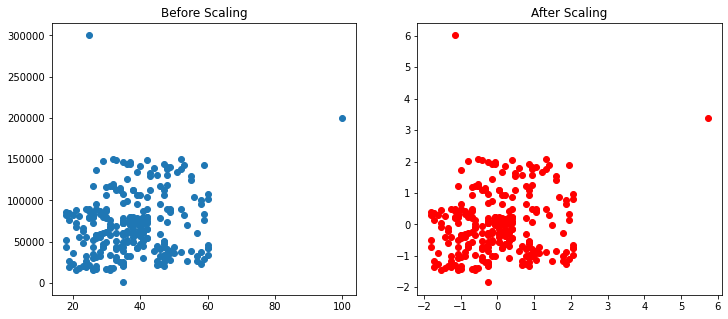

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['Salary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_ss['Age'], X_train_ss['Salary'], color = 'red')
ax2.set_title('After Scaling')
plt.show()

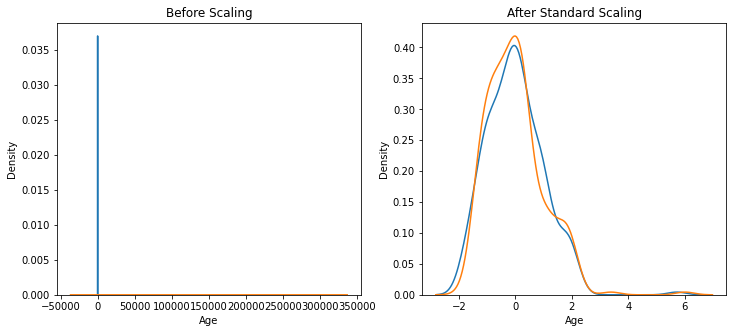

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['Salary'], ax = ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_ss['Age'], ax = ax2)
sns.kdeplot(X_train_ss['Salary'], ax = ax2)

plt.show()

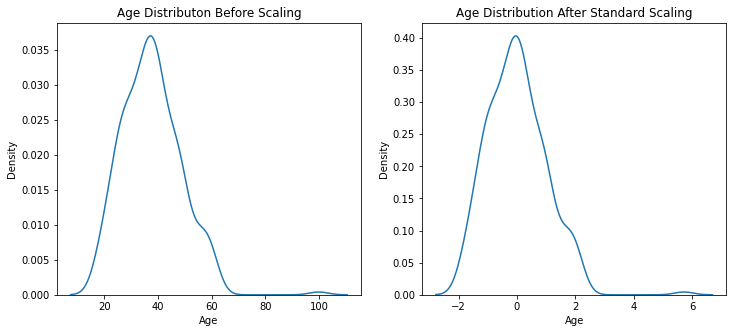

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Age Distributon Before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_ss['Age'], ax = ax2)

plt.show()

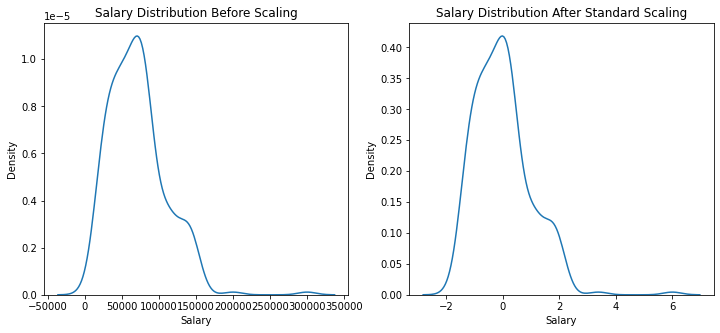

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['Salary'], ax = ax1)

ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_ss['Salary'], ax = ax2)

plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, y_pred)

0.6446280991735537

In [45]:
lr.fit(X_train_ss, y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test_ss)

In [47]:
accuracy_score(y_test, y_pred)

0.8099173553719008